## 2D Steady State Heat Conduction in a Rectangular Plate (GS Solver)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

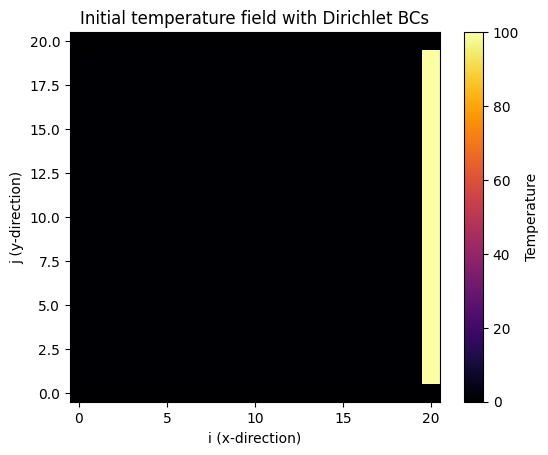

In [2]:
# Grid size
Nx, Ny = 21, 21

# Allocate temperature field
T = np.zeros((Nx, Ny))

# Dirichlet boundary conditions
T[0, :]  = 0.0   # left edge
T[-1, :] = 100.0   # right edge
T[:, 0]  = 0.0   # bottom edge
T[:, -1] = 0.0   # top edge (nonzero to drive the solution)

# Initial guess for interior (optional but helpful)
T[1:-1, 1:-1] = 0.5

# Plot initial condition
plt.figure()
plt.imshow(T.T, origin="lower", cmap="inferno")
plt.colorbar(label="Temperature")
plt.title("Initial temperature field with Dirichlet BCs")
plt.xlabel("i (x-direction)")
plt.ylabel("j (y-direction)")
plt.show()

### Cell 2 — Solve steady-state Laplace equation (Gauss–Seidel)

We solve
\begin{equation}
\nabla^2 T = 0
\end{equation}
using the 5-point stencil.

In [4]:
# Gauss–Seidel parameters
max_iter = 500
tol = 1e-6

for it in range(max_iter):
    max_change = 0.0

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            Told = T[i, j]
            # 5-point Laplace stencil (dx = dy)
            T[i, j] = 0.25 * (
                T[i+1, j] + T[i-1, j] +
                T[i, j+1] + T[i, j-1]
            )
            max_change = max(max_change, abs(T[i, j] - Told))
    if max_change < tol:
        print(f"Converged in {it} iterations")
        break


Converged in 362 iterations


In [5]:
max_change

np.float64(9.801069822401587e-07)

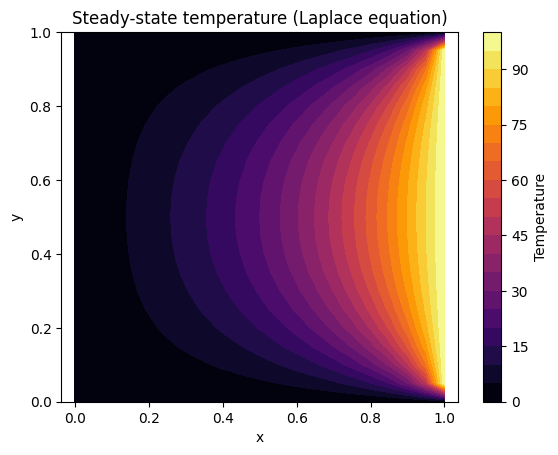

In [7]:
# Create physical coordinate arrays (optional but recommended)
x = np.linspace(0.0, 1.0, Nx)
y = np.linspace(0.0, 1.0, Ny)
X, Y = np.meshgrid(x, y, indexing="ij")

# Contour plot of steady-state solution
plt.figure()
cs = plt.contourf(X, Y, T, levels=20, cmap="inferno")
plt.colorbar(cs, label="Temperature")
plt.title("Steady-state temperature (Laplace equation)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()